In [28]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

| Student name | student number | 
| --- | --- | 
| Evan Lont |  | Visualizations, setup Github  |
| Joep Haanen |  | Visualizations |
| Lotte te Kulve |  | Data preprocessing, visualizations |
| Robin Kuipers |  | 14273810 |

# Correlation between Happiness and Economic Factors
## Introduction

Our data analysis will focus on exploring the correlation between happiness and economic factors. Using the "World Happiness Report" dataset and relevant economic indicators such as GDP per capita, inflation rates, and consumer price index (CPI), we will investigate the relationship between subjective well-being and economic stability. By analyzing the data, we aim to determine whether countries with higher economic indicators tend to exhibit higher happiness scores. This study will contribute to our understanding of how economic factors influence individual and societal levels of happiness.

#### Perspectives
1. Consumer Price Index (CPI) and Happiness: We want to examine the impact of
CPI on happiness. We will argue that a higher CPI, reflecting increased prices of
goods and services, could potentially reduce individuals' satisfaction with their
standard of living, impacting overall happiness levels.

2. Inflation Rates and Happiness: We want to investigate the relationship between
inflation rates and happiness. We will argue that high inflation rates may lead to
increased uncertainty, economic instability, and decreased purchasing power,
potentially negatively affecting happiness levels in a country.

3. GDP per Capita and Happiness: We will explore the correlation between GDP per
capita and happiness scores. We will argue that countries with higher GDP per
capita may have better economic opportunities, access to resources, and quality of
life, which could positively impact happiness levels.

## Datasets and preprocessing
We decided to use the World Happiness Dataset from WHO. For our second dataset, we wanted to use a dataset about inflation trends from (at least) ten years ago up until 2022. We found an inflation dataset from OECD data that matched our requirements. We then analysed the two datasets and came to the conclusion that we needed a more comprehensive dataset for the happiness measurement, because it only contained data for the year 2019. To make accurate analyses, the dataset has to match the time periods of the other. Also, the inflation dataset can possibly give us interesting visualisations because of the inflation trends before, during and (somewhat) after the COVID-19 pandemic. 

### Dataset 1: World happiness report
**Source:** https://worldhappiness.report/ed/2020/#appendices-and-data

**Number of records:** `20`

****************************************Number of variables:**************************************** `10`

**Description:** This dataset is from the Organization for Economic Cooperation and Development (OECD) and focuses on inflation, specifically the Consumer Price Index (CPI). The Consumer Price Index is a widely used measure of inflation, representing the average price change over time for a basket of goods and services commonly consumed by households.

The dataset likely includes information about inflation rates for various countries and regions over a specific time period. It can provide insights into how prices of goods and services have changed over time, serving as an important indicator of economic stability and the purchasing power of consumers.

By analyzing this dataset, we can gain a deeper understanding of inflation trends across different economies and regions. We could also compare the inflation rates of different countries to assess their economic performance, identify periods of high or low inflation, and study the potential impacts on various sectors such as investment, wages, and consumer spending.

| Variable | Datatype | Measurement scale |
| --- | --- | --- |
| country name | Categorical | Nominal |
| Regional indicator | Categorical | Nominal |
| Happiness score | Continuous | Interval |
| upperwhisker | Continuous | Interval |
| lowerwhisker | Continuous | Interval |
| Logged GDP per capita | Continuous | Ratio |
| Healthy life expectancy | Continuous | Interval |
| Generosity | Continuous | Interval |
| Perceptions of corruption | Continuous | Interval |
| Explained by: Log GDP per capita | Continuous | Ratio |
| Explained by: Healthy life expectancy | Continuous | Ratio |
| Explained by: Freedom to make life choices | Continuous | Ratio |
| Explained by: Generosity | Continuous | Ratio |
| Explained by: Social support | Continuous | Ratio |
| Explained by: Perceptions of corruption | Continuous | Ratio |
| Dystopia + residual | Continuous | Interval |

### Dataset 2: Inflation (CPI)

**Source:** https://data.oecd.org/price/inflation-cpi.htm

**Number of records:** `490`

****************************************Number of variables:**************************************** `8`

**Description:** The "Inflation (CPI)" dataset from the OECD contains information on consumer price index (CPI) and inflation rates across various countries. It provides a comprehensive view of the changes in price levels for goods and services over time, allowing for the analysis and comparison of inflation rates among different economies. The dataset includes indicators such as headline inflation, core inflation, and various sub-components of CPI. It serves as a valuable resource for understanding and monitoring inflation trends at a global level.

| Variable | Datatype | Measurement scale |
| --- | --- | --- |
| Location | Categorical | Nominal |
| Regional indicator | Categorical | Nominal |
| Subject | categorical | Nominal |
| Measure | categorical | Interval |
| Frequency | Continuous | Interval |
| Time | Continuous | Interval |
| Value | Continuous | Interval |
| Flag code | Categorical | Nominal |


## Data selection

for each variable we asked ourselves the following questions:

- What are the variables in the data?
- Do we need all the data points and variables?
- Are there data that are out of scope?
- Are there privacy or ethical issues in the data?
- Is it practical to process the variable that we want?

To prevent our dataset to be too large, we decided to analyse the data for the years 2020 and 2022, because both datasets' values varied a lot in between these years. Another reason for the selection of only two different years is that we want to find out how much the data can differ in such a small timeframe.

Based on the discussions we had, we:

- We removed the following columns from the world happiness dataset:
    - Upperwhisker
    - Lowerwhisker
    - Standard error of ladder score
    - Dystopia + residual

- We rearranged columns so that we can easily see which country and year we’re looking at.
- We removed countries we didn’t need for our analysis and kept the following selection:

'Switzerland', 'Netherlands', 'New Zealand', 'Canada','Saudi Arabia', 
'Chile', 'Japan', 'Portugal', 'China', 'Vietnam','Nepal', 'South Africa', 'Ukraine', 'Morocco', 'Cameroon', 'Iran','Egypt', 'India'

- We changed country names to abbreviations
    Both datasets contained information per country, but the inflation dataset has abbreviations as values and the happiness dataset has the full country names. If we want to compare data for certain countries, we have to align these values to either abbreviations or full country names. We chose for abbreviations. By running the following code in a Jupyter Notebook:
    

In [36]:
inflation = pd.read_csv('inflation.csv')
happiness_2020 = pd.read_csv('happiness_2020-def.csv')
happiness_2022 = pd.read_csv('happiness_2022-def.csv')
inflation.drop('Flag Codes', axis=1, inplace=True)
inflation.drop('FREQUENCY', axis=1, inplace=True)

In [37]:
# Specify the desired column order
column_order = ['Country name', 'Happiness score', 'Dystopia + residual', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption']

# Reorder the columns
happiness_2020 = happiness_2020[column_order]
happiness_2022 = happiness_2022[column_order]

KeyError: "['Country name', 'Dystopia + residual', 'Explained by: Log GDP per capita'] not in index"

In [39]:
# list all unique country names
unique_countries = pd.unique(happiness_2020['Country name'])

# list all unique abbreviations
unique_abbr = pd.unique(inflation['LOCATION'])

# map all unique country names in a dictionary with abbreviations as values
country_mapping = {
    "Switzerland": "CHE",
    "Netherlands": "NLD",
    "New Zealand": "NZL",
    "Canada": "CAN",
    "Saudi Arabia": "SAU",
    "Chile": "CHL",
    "Japan": "JPN",
    "Portugal": "PRT",
    "China": "CHN",
    "South Africa": "ZAF",
    "India": "IND"
}

# map the dictionary to the values of 'country name' in the happiness dataset
happiness_2020['Country name'] = happiness_2020['Country name'].map(country_mapping)
happiness_2020.head()

# export to csv
#happiness_2020.to_csv('happiness_2020.csv', index=False)

,Country name,Happiness score,Dystopia + residual,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,NaN,7.5599,2.350267,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
1,NaN,7.4489,2.352117,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570
2,NaN,7.2996,2.128108,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268
3,NaN,7.2321,2.195269,1.301648,1.435392,1.022502,0.644028,0.281529,0.351702
4,NaN,6.4065,2.203119,1.334329,1.309950,0.759818,0.548477,0.087441,0.163322


In [40]:
pd.DataFrame.head(inflation, n=5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,TIME,Value
0,AUS,CPI,FOOD,AGRWTH,2018,0.670376
1,AUS,CPI,FOOD,AGRWTH,2019,4.482894
2,AUS,CPI,FOOD,AGRWTH,2020,9.320118
3,AUS,CPI,FOOD,AGRWTH,2021,7.909739
4,AUS,CPI,FOOD,AGRWTH,2022,8.166700


## Reflection

To be made → we’re waiting for feedback

## Work distribution

| Who? | Role | Tasks |
| --- | --- | --- |
| Evan |  | Visualizations, setup Github  |
| Joep |  | Visualizations |
| Lotte |  | Data preprocessing, visualizations |
| Robin |  | Data preprocessing, documentation |

## Visualizations

In [41]:
inflation2020 = inflation[inflation['TIME'] == 2020]
inflation2022 = inflation[inflation['TIME'] == 2022]

In [42]:
pd.DataFrame.head(happiness_2020, n=10)

,Country name,Happiness score,Dystopia + residual,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,NaN,7.5599,2.350267,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
1,NaN,7.4489,2.352117,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570
2,NaN,7.2996,2.128108,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268
3,NaN,7.2321,2.195269,1.301648,1.435392,1.022502,0.644028,0.281529,0.351702
4,NaN,6.4065,2.203119,1.334329,1.309950,0.759818,0.548477,0.087441,0.163322
5,NaN,6.2285,2.283013,1.096992,1.323287,0.889261,0.417482,0.155579,0.062849
6,NaN,5.9109,1.752559,1.168801,1.339530,0.979315,0.589895,0.053037,0.027733
7,NaN,5.1239,1.336182,0.990533,1.132081,0.867249,0.601605,0.079021,0.117256
8,NaN,4.8141,1.625117,0.902140,1.259086,0.407034,0.434782,0.126407,0.059502
9,NaN,3.5733,0.734131,0.730576,0.644199,0.540570,0.581142,0.237072,0.105588


In [43]:
pd.DataFrame.head(happiness_2022, n=10)

,Unnamed: 0,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,3,CHE,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461
1,4,NLD,7.415,2.137,1.945,1.206,0.787,0.651,0.271,0.419
2,9,NZL,7.200,1.954,1.852,1.235,0.752,0.680,0.245,0.483
3,14,CAN,7.025,1.924,1.886,1.188,0.783,0.659,0.217,0.368
4,24,SAU,6.523,2.075,1.870,1.092,0.577,0.651,0.078,0.180
5,43,CHL,6.172,2.040,1.651,1.080,0.748,0.460,0.124,0.069
6,55,PRT,6.016,1.691,1.760,1.078,0.777,0.655,0.016,0.039
7,71,CHN,5.585,1.516,1.508,0.958,0.705,0.656,0.099,0.142
8,90,ZAF,5.194,1.742,1.425,1.088,0.361,0.442,0.089,0.046
9,135,IND,3.777,0.795,1.167,0.376,0.471,0.647,0.198,0.123


Let's analyse the difference in inflation between 2020 and 2022:

- In 2020, the inflation was considerably lower than in 2022.
- Has the overall happiness score for generosity in 2022 decreased compared to 2020?
- Can this be explained by inflation?"

## Happiness and Generosity in 2020 vs 2022

- Countries on the X-axis
- Bar for 2020 and bar for 2022 in one graph
- Happiness score and generosity on the Y-axis (separate graph for each variable)

#### Question: Is inflation higher in 2022 than in 2020 in every selected country?

#### Question: Is the happiness score lower in 2022 than in 2020 every selected country?


In [44]:
# Define the colors (ChatGPT)
colors = ['rgb(102,194,165)', 'rgb(252,141,98)', 'rgb(141,160,203)']

# creeer de layout
layout = go.Layout(
    xaxis=go.layout.XAxis(
        type='category' # het type van de X as is categorisch
    ),
    yaxis = go.layout.YAxis(
        tickformat = ',.0%', # toon als percentage
    ),
    height=400
)

year2020 = go.Bar(
    x=happiness_2020['Country name'],
    y=happiness_2020['Explained by: Generosity'], # by year 2020
    name='2020',
    marker=dict(color=colors[0]) #ChatGPT 
)
year2022 = go.Bar(
    x=happiness_2022['Country'],
    y=happiness_2022['Explained by: Generosity'],
    name='2022',
    marker=dict(color=colors[1]) #ChatGPT
)

data = [year2020, year2022]
fig = go.Figure(data=data, layout=layout)

# labels
fig.update_layout(
    title="World happiness explained by generosity 2020 vs 2022",
    xaxis_title="Country",
    yaxis_title="Percentage explaind by generosity")
    
fig.show()

### Conclusion

The graph shows that the 'happiness explained by generosity is lower  for almost every country in 2022 than in 2020. Inflation is much higher in 2022 than in 2020. From this graph can be concluded that when inflation is higher, people experience less happiness due to generosity.


In [45]:
# Functie om de aslabels handmatig te formatteren
def custom_tickformat(value):
    return f"{value:.1f}".replace('.', ',')

# Define the colors (ChatGPT)
colors = ['rgb(102,194,165)', 'rgb(252,141,98)', 'rgb(141,160,203)']

# creeer de layout
layout = go.Layout(
    xaxis=go.layout.XAxis(
        type='category' # het type van de X as is categorisch
    ),
    yaxis=go.layout.YAxis(
        tickvals=fig.data[0].y,  # Gebruik de y-waarden als aslabels
        ticktext=[custom_tickformat(value) for value in fig.data[0].y],  # Formatteer de aslabels
    ),
    height=400
)

# defineer de data
year2020 = go.Bar(
    x=inflation2020['LOCATION'],
    y=inflation2020['Value'], # by year 2020
    name='2020',
    marker=dict(color=colors[0]) #ChatGPT 
)
year2022 = go.Bar(
    x=inflation2022['LOCATION'],
    y=inflation2022['Value'],
    name='2022',
    marker=dict(color=colors[1]) #ChatGPT
)

# creeer het figuur
data = [year2020, year2022]
fig = go.Figure(data=data, layout=layout)

# labels
fig.update_layout(
    title="Inflatie per land",
    xaxis_title="Country",
    yaxis_title="Inflatie percentage ten opzichte van 2015")
    
fig.show()

### Happiness vs inflation in different countries

In [46]:
inflation2020 = inflation2020[inflation2020["SUBJECT"]=="TOT"]
inflation2020 = inflation2020[inflation2020["MEASURE"]=="IDX2015"]

inflation2022 = inflation2022[inflation2022["SUBJECT"]=="TOT"]
inflation2022 = inflation2022[inflation2022["MEASURE"]=="IDX2015"]

ValueError: x and y must be the same size

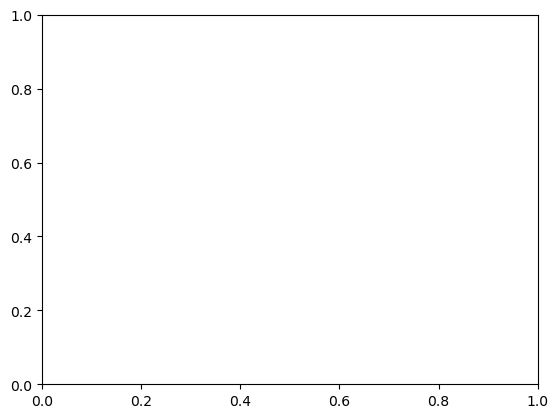

In [47]:
# Maak van de x-as 2 getallen in plaats van 3 getallen
inflation2020["Value"] = inflation2020["Value"] - 100
inflation2022["Value"] = inflation2022["Value"] - 100

# Plot de punten in de grafiek
plt.scatter(inflation2020["Value"], happiness_2020["Happiness score"], label="2020")
plt.scatter(inflation2022["Value"], happiness_2022["Happiness score"], label="2022")

# Geef labels aan de assen
plt.xlabel('Increase in inflation compared to 2015 (%)')
plt.ylabel('Happiness Score')

# Voeg labels toe aan de punten
for x, y, label in zip(inflation2020["Value"], happiness_2020["Happiness score"], inflation2020["LOCATION"]):
    plt.text(x, y, label, ha='center', va='bottom')
for x, y, label in zip(inflation2022["Value"], happiness_2022["Happiness score"], inflation2022["LOCATION"]):
    plt.text(x, y, label, ha='center', va='bottom')

# Trek lijnen tussen de punten voor overzicht
plt.plot([inflation2020["Value"], inflation2022["Value"]], [happiness_2020["Happiness score"], happiness_20222["Happiness score"]], 'k-')
plt.title("Happiness and inflation in countries")

#
plt.legend()

# Toon de grafiek
plt.show()